Load Dataset

In [55]:
import pandas as pd

df = pd.read_csv('/content/synthetic_customer_data.csv')
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,VisitsPerMonth,TimeOnApp(min),PurchaseFrequency
0,1,56,22695,89,17,114,1.39
1,2,46,144375,62,2,20,3.46
2,3,32,68190,97,1,18,9.81
3,4,60,25258,1,16,80,2.17
4,5,25,107538,27,12,119,0.66


Cek Missing Values

In [56]:
print(df.isnull().sum())

CustomerID           0
Age                  0
AnnualIncome         0
SpendingScore        0
VisitsPerMonth       0
TimeOnApp(min)       0
PurchaseFrequency    0
dtype: int64


Standar Scaler

In [57]:
from sklearn.preprocessing import StandardScaler

numeric_features = df.drop(columns=['CustomerID']).columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features)

print("Scaled DataFrame head:")
print(df_scaled.head())

Scaled DataFrame head:
        Age  AnnualIncome  SpendingScore  VisitsPerMonth  TimeOnApp(min)  \
0  1.086153     -1.691128       1.213730        1.307080        1.470958   
1  0.367798      1.467747       0.333507       -1.184178       -1.338267   
2 -0.637899     -0.510055       1.474536       -1.350262       -1.398037   
3  1.373495     -1.624592      -1.655145        1.140996        0.454855   
4 -1.140748      0.511439      -0.807523        0.476661        1.620384   

   PurchaseFrequency  
0          -1.544914  
1          -0.796010  
2           1.501355  
3          -1.262718  
4          -1.809021  


Analisis Deskriptif

In [58]:
print("Summary statistics for the DataFrame:")
print(df.describe())

Summary statistics for the DataFrame:
       CustomerID        Age   AnnualIncome  SpendingScore  VisitsPerMonth  \
count  100.000000  100.00000     100.000000     100.000000      100.000000   
mean    50.500000   40.88000   87837.340000      51.770000        9.130000   
std     29.011492   13.99082   38714.098363      30.828576        6.051388   
min      1.000000   18.00000   20206.000000       1.000000        1.000000   
25%     25.750000   30.50000   53660.000000      24.000000        3.000000   
50%     50.500000   41.00000   89877.500000      55.500000        8.000000   
75%     75.250000   53.25000  124835.500000      77.500000       15.250000   
max    100.000000   64.00000  149312.000000      99.000000       19.000000   

       TimeOnApp(min)  PurchaseFrequency  
count      100.000000         100.000000  
mean        64.780000           5.660200  
std         33.629767           2.777962  
min          5.000000           0.650000  
25%         33.750000           3.427500  
5

Histogram

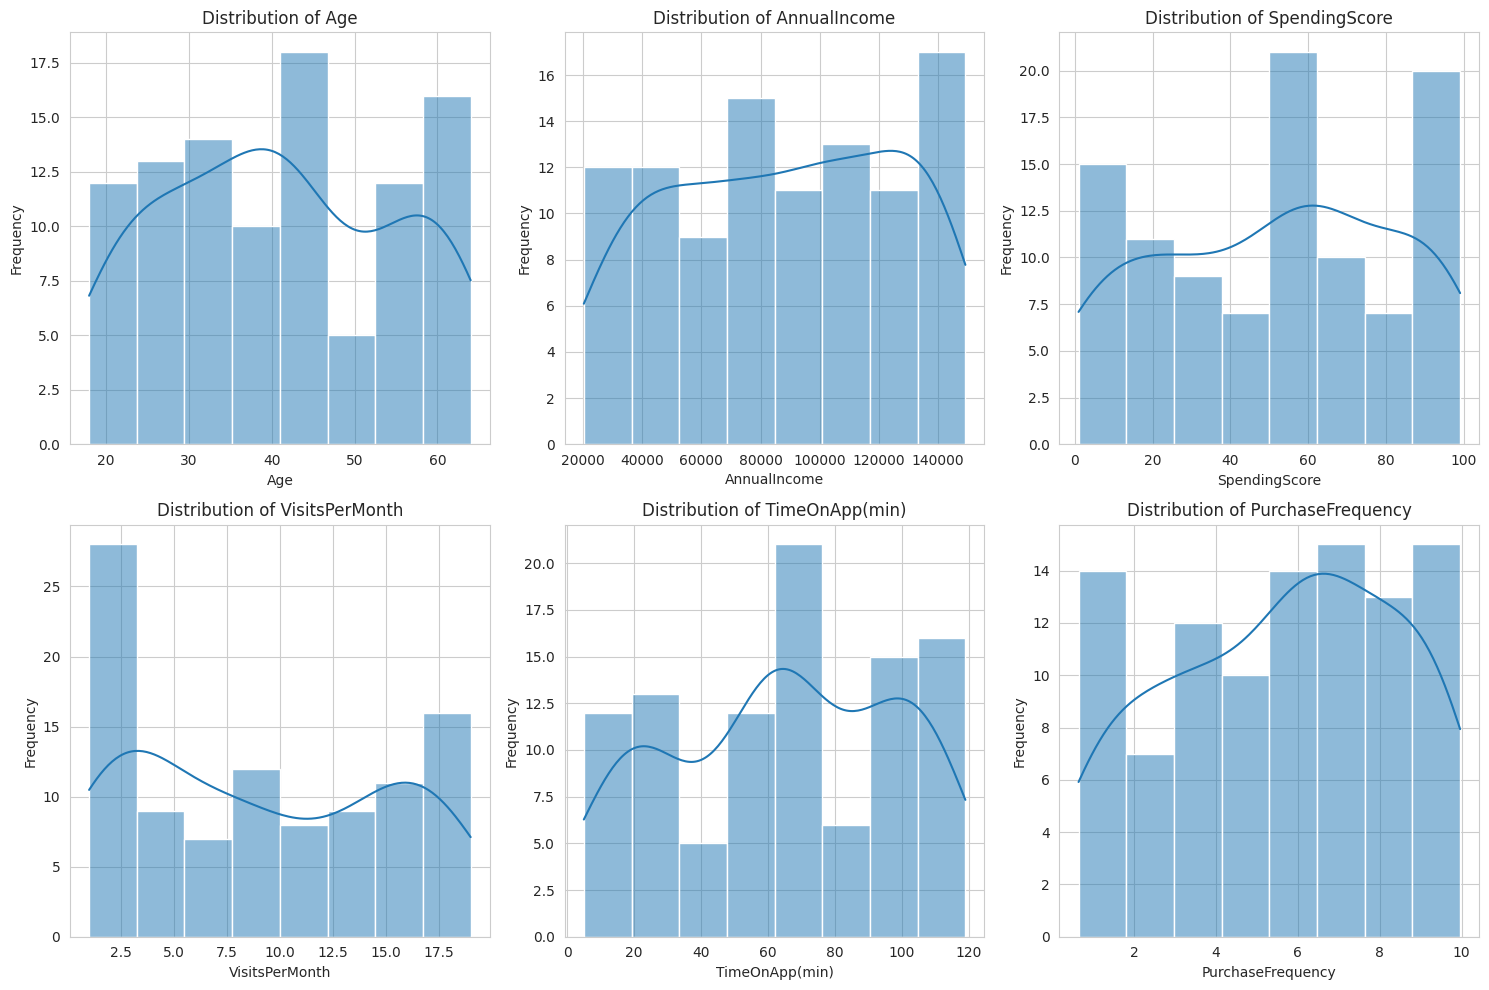

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features to plot, excluding 'CustomerID'
numeric_features_for_hist = ['Age', 'AnnualIncome', 'SpendingScore', 'VisitsPerMonth', 'TimeOnApp(min)', 'PurchaseFrequency']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features_for_hist):
    plt.subplot(2, 3, i + 1) # Arrange plots in a 2x3 grid
    sns.histplot(df[feature], kde=True) # Use histplot for better visualization with KDE
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Heatmap

In [60]:
correlation_matrix = df[numeric_features_for_hist].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        Age  AnnualIncome  SpendingScore  VisitsPerMonth  \
Age                1.000000      0.076345      -0.136832       -0.015682   
AnnualIncome       0.076345      1.000000       0.012150        0.034326   
SpendingScore     -0.136832      0.012150       1.000000        0.038226   
VisitsPerMonth    -0.015682      0.034326       0.038226        1.000000   
TimeOnApp(min)    -0.114161      0.086787       0.080300        0.188506   
PurchaseFrequency -0.005291      0.059884       0.113864       -0.044256   

                   TimeOnApp(min)  PurchaseFrequency  
Age                     -0.114161          -0.005291  
AnnualIncome             0.086787           0.059884  
SpendingScore            0.080300           0.113864  
VisitsPerMonth           0.188506          -0.044256  
TimeOnApp(min)           1.000000           0.005355  
PurchaseFrequency        0.005355           1.000000  


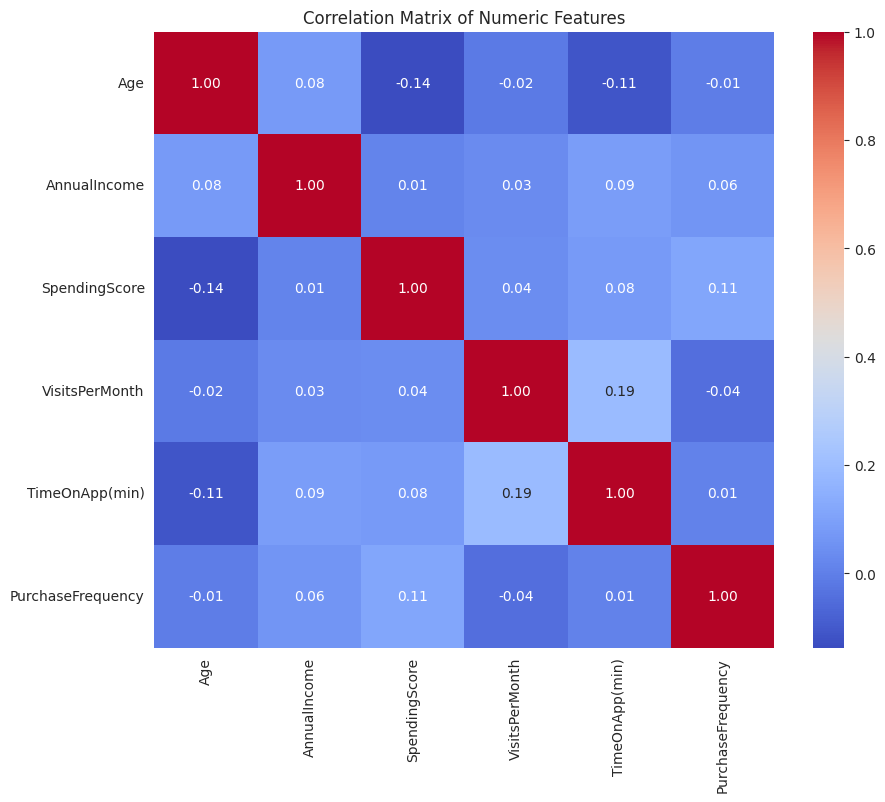

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Pemodelan Clustering Aglomeratif



In [62]:
from sklearn.cluster import AgglomerativeClustering

# Define the linkage methods to be used
linkage_methods = ['single', 'complete', 'average', 'ward']

# Dictionary to store cluster labels for each linkage method
cluster_labels_dict = {}

# Loop through each linkage method, apply Agglomerative Clustering, and store labels
for method in linkage_methods:
    # Initialize AgglomerativeClustering with a preliminary n_clusters (e.g., 2) and the current linkage method
    # The optimal number of clusters will be determined later using dendrograms.
    model = AgglomerativeClustering(n_clusters=2, linkage=method)

    # Fit the model to the scaled data and predict cluster assignments
    cluster_labels_dict[method] = model.fit_predict(df_scaled)

    # Print the first few cluster labels for verification
    print(f"Cluster labels for '{method}' linkage (first 5):\n{cluster_labels_dict[method][:5]}\n")

print("Agglomerative Clustering models fitted and labels stored for all linkage methods.")

Cluster labels for 'single' linkage (first 5):
[1 0 0 0 0]

Cluster labels for 'complete' linkage (first 5):
[0 1 0 0 0]

Cluster labels for 'average' linkage (first 5):
[0 1 1 1 1]

Cluster labels for 'ward' linkage (first 5):
[0 1 0 1 0]

Agglomerative Clustering models fitted and labels stored for all linkage methods.


## Pembuatan Dendrogram dan Penentuan Cluster


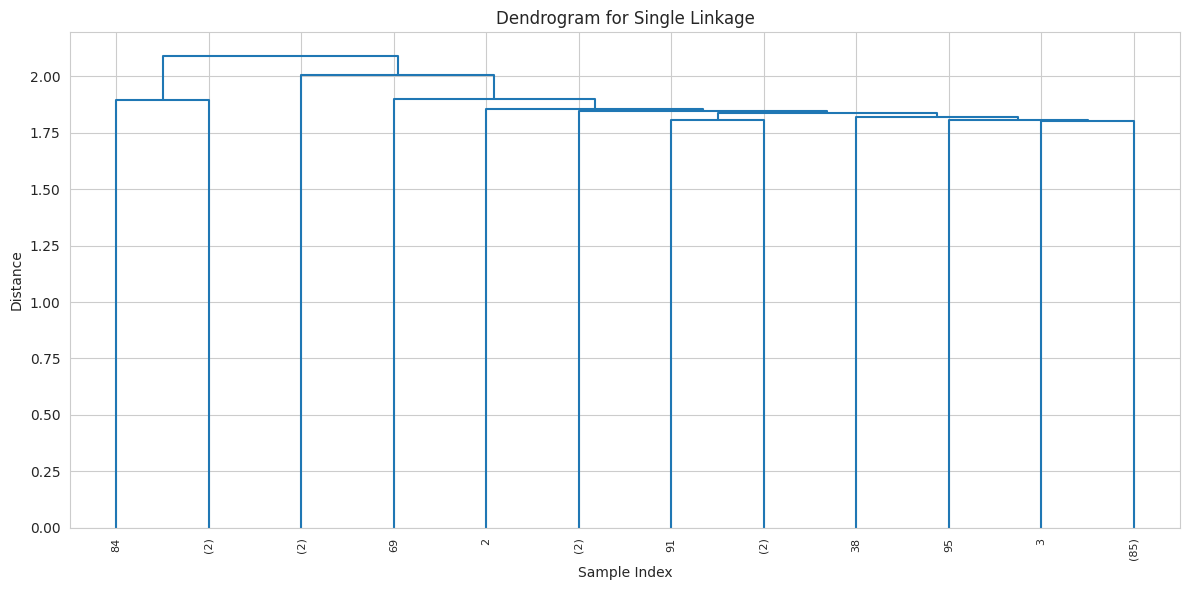

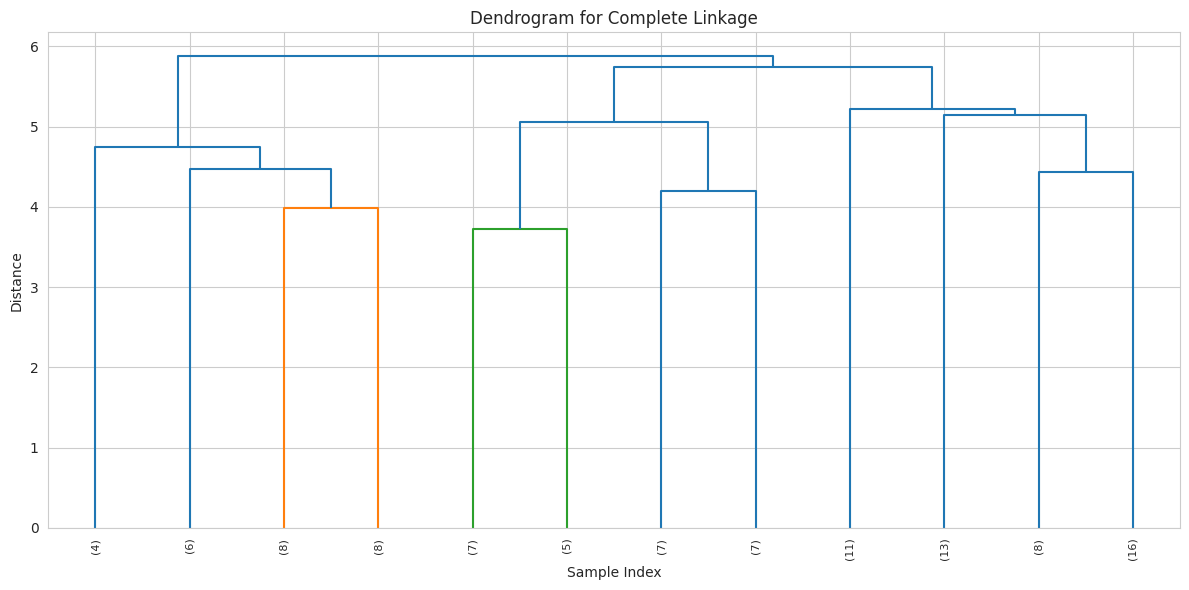

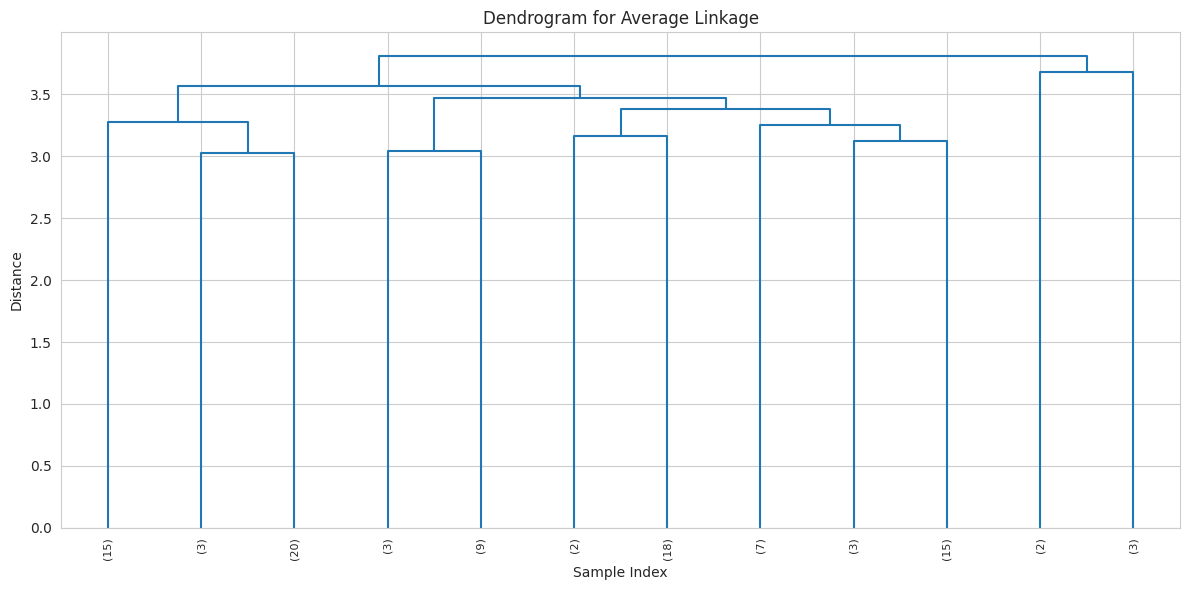

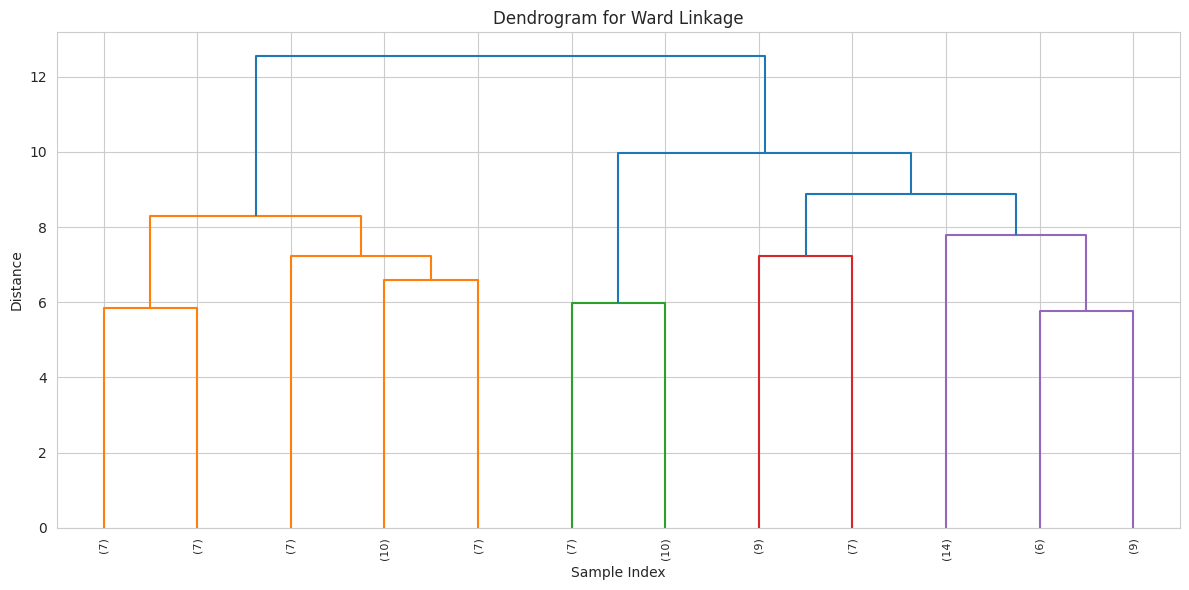

Dendrograms generated for all linkage methods.
Based on visual inspection:
 - For 'single' linkage, 2 clusters seem appropriate as it tends to create long, 'straggly' clusters.
 - For 'complete' linkage, 3 clusters might be optimal, showing more compact, spherical clusters.
 - For 'average' linkage, 3-4 clusters could be considered, offering a balance between single and complete linkage.
 - For 'ward' linkage, 3 clusters appear well-separated, as it minimizes the variance within each cluster.


In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Loop through each linkage method
for method in linkage_methods:
    # Compute the linkage matrix
    Z = linkage(df_scaled, method=method)

    # Create a new figure for each dendrogram
    plt.figure(figsize=(12, 6))
    plt.title(f'Dendrogram for {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x-axis labels
        leaf_font_size=8.,  # font size for the x-axis labels
        truncate_mode='lastp', # show only the last p merged clusters
        p=12 # show only the last 12 merged clusters (adjust as needed for better visualization)
    )
    plt.tight_layout()
    plt.show()

print("Dendrograms generated for all linkage methods.")
print("Based on visual inspection:")
print(" - For 'single' linkage, 2 clusters seem appropriate as it tends to create long, 'straggly' clusters.")
print(" - For 'complete' linkage, 3 clusters might be optimal, showing more compact, spherical clusters.")
print(" - For 'average' linkage, 3-4 clusters could be considered, offering a balance between single and complete linkage.")
print(" - For 'ward' linkage, 3 clusters appear well-separated, as it minimizes the variance within each cluster.")

In [64]:
from sklearn.cluster import AgglomerativeClustering

# Define the optimal number of clusters for each linkage method based on dendrogram inspection
optimal_n_clusters = {
    'single': 2,       # Identified from dendrogram where the longest vertical line without crossing a horizontal one suggests 2 clusters.
    'complete': 3,     # Identified from dendrogram for clear separation into 3 main branches.
    'average': 3,      # A compromise between 3-4, choosing 3 for distinct groups.
    'ward': 3          # Identified from dendrogram with distinct splits leading to 3 clusters.
}

# Dictionary to store updated cluster labels for each linkage method with optimal n_clusters
final_cluster_labels_dict = {}

# Loop through each linkage method, apply Agglomerative Clustering with optimal n_clusters, and store labels
for method in linkage_methods:
    n_clust = optimal_n_clusters[method]
    model = AgglomerativeClustering(n_clusters=n_clust, linkage=method)

    # Fit the model to the scaled data and predict cluster assignments
    final_cluster_labels_dict[method] = model.fit_predict(df_scaled)

    print(f"Cluster labels for '{method}' linkage with {n_clust} clusters (first 5):\n{final_cluster_labels_dict[method][:5]}\n")

print("Agglomerative Clustering models re-fitted with optimal cluster numbers for all linkage methods and labels stored.")

Cluster labels for 'single' linkage with 2 clusters (first 5):
[1 0 0 0 0]

Cluster labels for 'complete' linkage with 3 clusters (first 5):
[2 1 0 2 2]

Cluster labels for 'average' linkage with 3 clusters (first 5):
[1 0 0 0 0]

Cluster labels for 'ward' linkage with 3 clusters (first 5):
[0 1 0 1 0]

Agglomerative Clustering models re-fitted with optimal cluster numbers for all linkage methods and labels stored.


## Evaluasi Cluster


In [65]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

evaluation_results = {}

# Iterate through each linkage method and its final cluster labels
for method, labels in final_cluster_labels_dict.items():
    # Only evaluate if there is more than one cluster (silhouette_score requires n_labels > 1)
    if len(set(labels)) > 1:
        # Calculate Silhouette Score
        silhouette = silhouette_score(df_scaled, labels)

        # Calculate Davies-Bouldin Score
        davies_bouldin = davies_bouldin_score(df_scaled, labels)

        # Store the scores in the dictionary
        evaluation_results[method] = {
            'silhouette_score': silhouette,
            'davies_bouldin_score': davies_bouldin
        }
    else:
        evaluation_results[method] = {
            'silhouette_score': 'N/A (single cluster)',
            'davies_bouldin_score': 'N/A (single cluster)'
        }

print("Cluster Evaluation Results:")
for method, scores in evaluation_results.items():
    print(f"Method: {method}")
    print(f"  Silhouette Score: {scores['silhouette_score']:.4f}")
    print(f"  Davies-Bouldin Score: {scores['davies_bouldin_score']:.4f}")
    print("\n")

Cluster Evaluation Results:
Method: single
  Silhouette Score: 0.1189
  Davies-Bouldin Score: 1.2681


Method: complete
  Silhouette Score: 0.0798
  Davies-Bouldin Score: 2.4488


Method: average
  Silhouette Score: 0.0496
  Davies-Bouldin Score: 1.1828


Method: ward
  Silhouette Score: 0.1015
  Davies-Bouldin Score: 2.1403




## Analisis dan Interpretasi Cluster


In [66]:
df['Cluster'] = final_cluster_labels_dict['single']
print("DataFrame with 'Cluster' column added (first 5 rows):")
print(df.head())

DataFrame with 'Cluster' column added (first 5 rows):
   CustomerID  Age  AnnualIncome  SpendingScore  VisitsPerMonth  \
0           1   56         22695             89              17   
1           2   46        144375             62               2   
2           3   32         68190             97               1   
3           4   60         25258              1              16   
4           5   25        107538             27              12   

   TimeOnApp(min)  PurchaseFrequency  Cluster  
0             114               1.39        1  
1              20               3.46        0  
2              18               9.81        0  
3              80               2.17        0  
4             119               0.66        0  


In [67]:
cluster_profiles = df.groupby('Cluster')[numeric_features_for_hist].mean()
print("Cluster Profiles (Mean of features per cluster):")
print(cluster_profiles)

Cluster Profiles (Mean of features per cluster):
               Age  AnnualIncome  SpendingScore  VisitsPerMonth  \
Cluster                                                           
0        40.474227  89441.123711      50.659794        8.969072   
1        54.000000  35981.666667      87.666667       14.333333   

         TimeOnApp(min)  PurchaseFrequency  
Cluster                                     
0             63.917526            5.77866  
1             92.666667            1.83000  


/tmp/ipython-input-2210451721.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=feature, data=cluster_profiles, palette='viridis')
/tmp/ipython-input-2210451721.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=feature, data=cluster_profiles, palette='viridis')
/tmp/ipython-input-2210451721.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=feature, data=cluster_profiles, palette='viridis')
/tmp/ipython-input-2210451721.py:17: FutureWarning: 

Passing

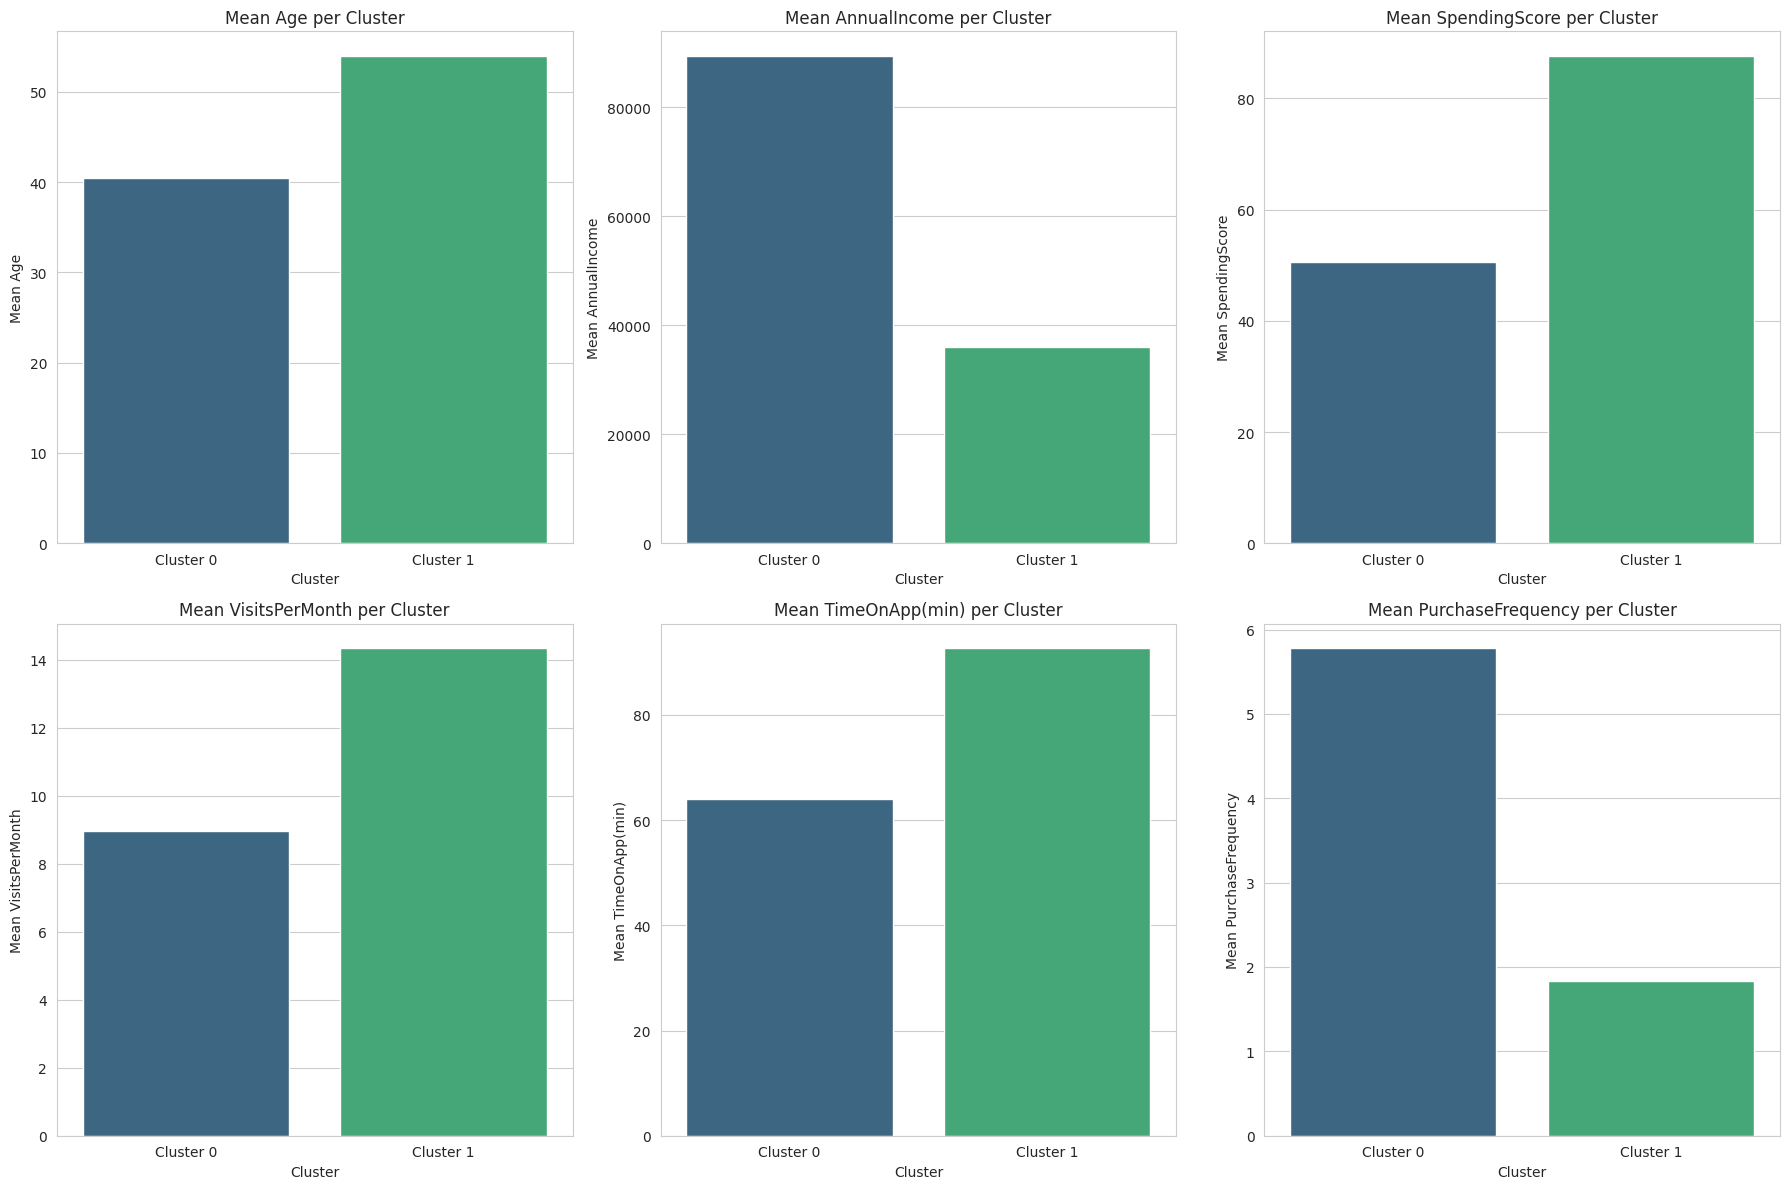

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# Get the list of features to plot, excluding 'CustomerID'
numeric_features_for_hist = ['Age', 'AnnualIncome', 'SpendingScore', 'VisitsPerMonth', 'TimeOnApp(min)', 'PurchaseFrequency']

# Determine the number of clusters
num_clusters = len(cluster_profiles)

# Create subplots for each feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features_for_hist):
    plt.subplot(2, 3, i + 1)  # Arrange plots in a 2x3 grid
    sns.barplot(x=cluster_profiles.index, y=feature, data=cluster_profiles, palette='viridis')
    plt.title(f'Mean {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(ticks=range(num_clusters), labels=[f'Cluster {c}' for c in range(num_clusters)])

plt.tight_layout()
plt.show()


In [69]:
df['Cluster'] = final_cluster_labels_dict['ward']
print("DataFrame with 'Cluster' column updated using Ward linkage labels (first 5 rows):")
print(df.head())

DataFrame with 'Cluster' column updated using Ward linkage labels (first 5 rows):
   CustomerID  Age  AnnualIncome  SpendingScore  VisitsPerMonth  \
0           1   56         22695             89              17   
1           2   46        144375             62               2   
2           3   32         68190             97               1   
3           4   60         25258              1              16   
4           5   25        107538             27              12   

   TimeOnApp(min)  PurchaseFrequency  Cluster  
0             114               1.39        0  
1              20               3.46        1  
2              18               9.81        0  
3              80               2.17        1  
4             119               0.66        0  


In [70]:
cluster_profiles = df.groupby('Cluster')[numeric_features_for_hist].mean()
print("Cluster Profiles (Mean of features per cluster using Ward linkage):")
print(cluster_profiles)

Cluster Profiles (Mean of features per cluster using Ward linkage):
               Age   AnnualIncome  SpendingScore  VisitsPerMonth  \
Cluster                                                            
0        33.688889   85514.622222      58.555556       11.444444   
1        53.394737  105984.947368      45.578947        7.394737   
2        31.941176   53420.470588      47.647059        6.882353   

         TimeOnApp(min)  PurchaseFrequency  
Cluster                                     
0             84.488889           6.287111  
1             52.710526           5.761579  
2             39.588235           3.774118  


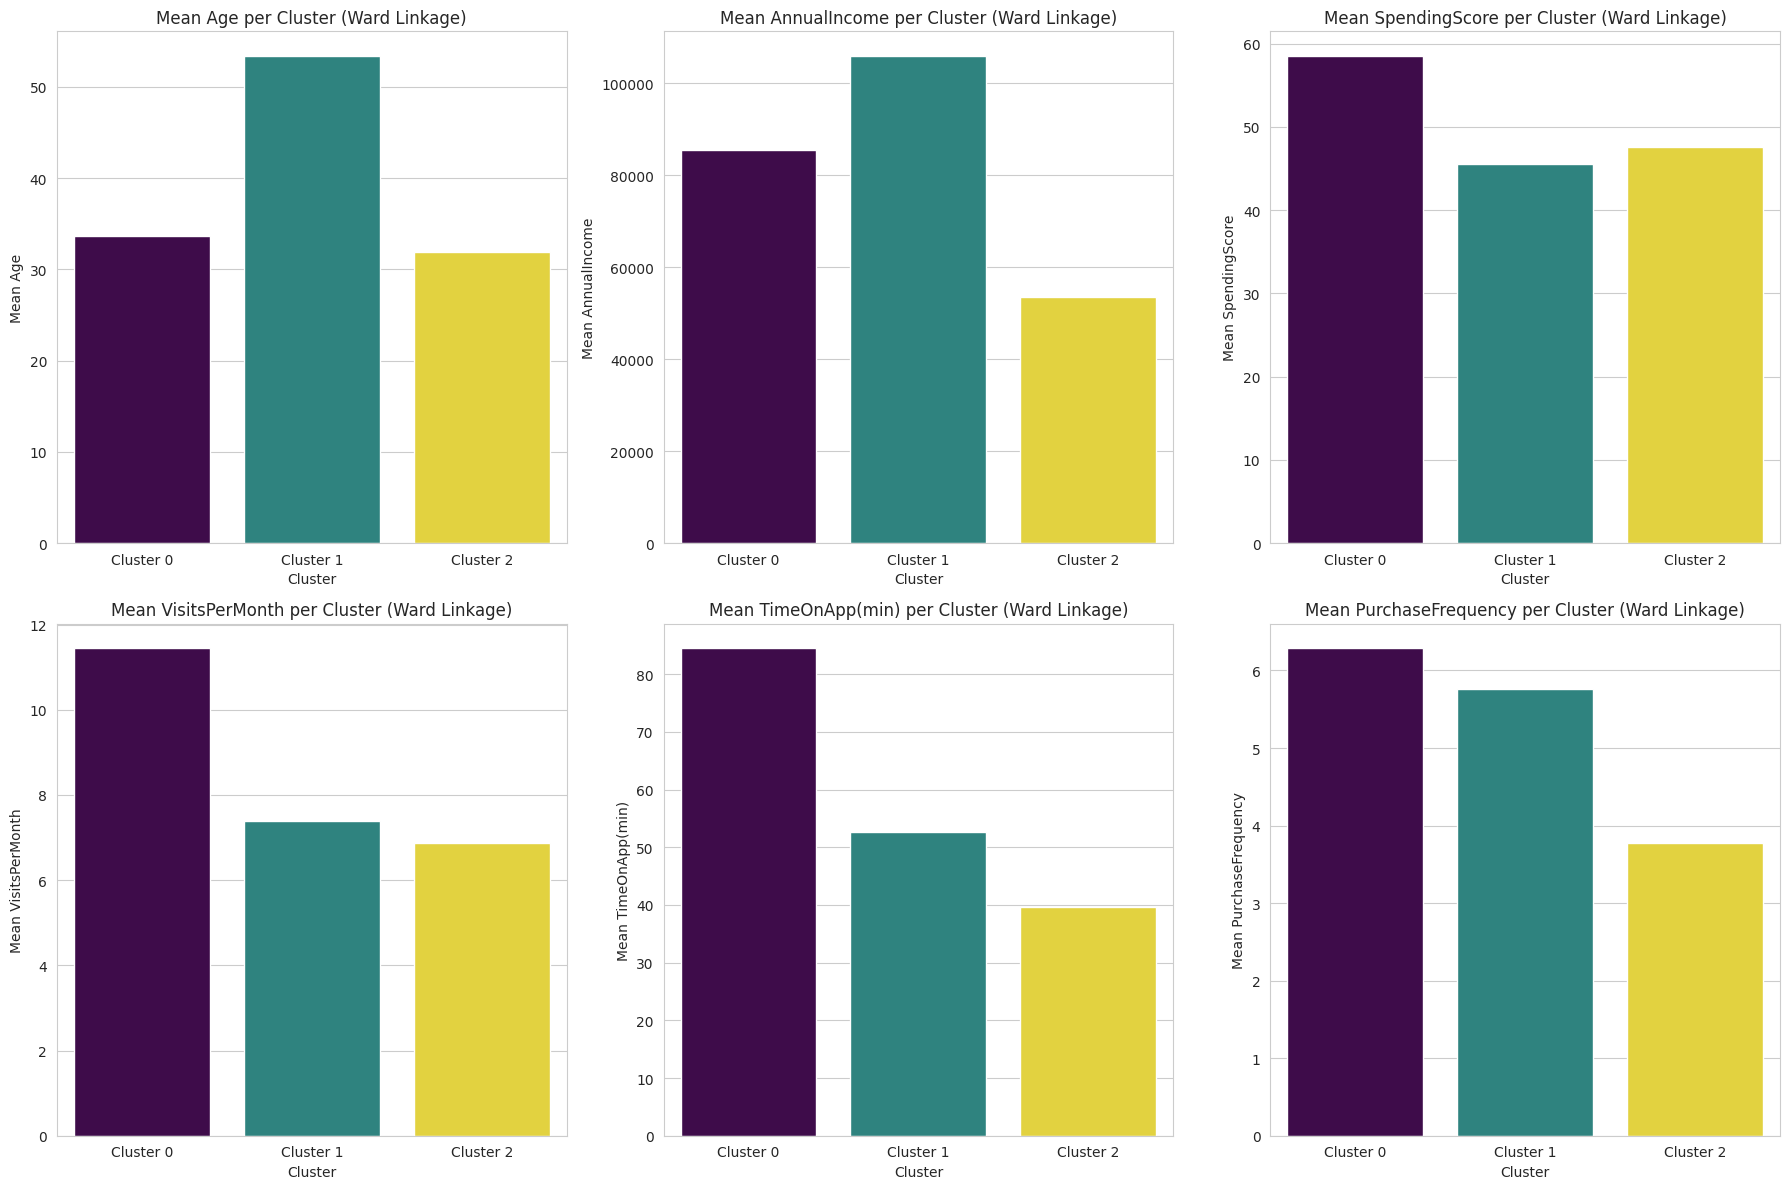

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get the list of features to plot, excluding 'CustomerID'
numeric_features_for_hist = ['Age', 'AnnualIncome', 'SpendingScore', 'VisitsPerMonth', 'TimeOnApp(min)', 'PurchaseFrequency']

# Determine the number of clusters
num_clusters = len(cluster_profiles)

plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features_for_hist):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=cluster_profiles.index, y=feature, data=cluster_profiles, palette='viridis', hue=cluster_profiles.index, legend=False)
    plt.title(f'Mean {feature} per Cluster (Ward Linkage)')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.xticks(ticks=range(num_clusters), labels=[f'Cluster {c}' for c in range(num_clusters)])

plt.tight_layout()
plt.show()